<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_t_score_%D0%BF%D0%BE_%D1%83%D1%80%D0%BE%D0%B2%D0%BD%D1%8F%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Analysis (Ignore Zero T-Score) ===
Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1145
Interval 0.10-0.20: Avg T-Score = 0.1068
Interval 0.20-0.30: Avg T-Score = 0.1127
Interval 0.30-0.40: Avg T-Score = 0.1125
Interval 0.40-0.50: Avg T-Score = 0.1219
Interval 0.50-0.60: Avg T-Score = 0.1179
Interval 0.60-0.70: Avg T-Score = 0.1183
Interval 0.70-0.80: Avg T-Score = 0.1079
Interval 0.80-0.90: Avg T-Score = 0.1205
Interval 0.90-1.00: Avg T-Score = 0.1101


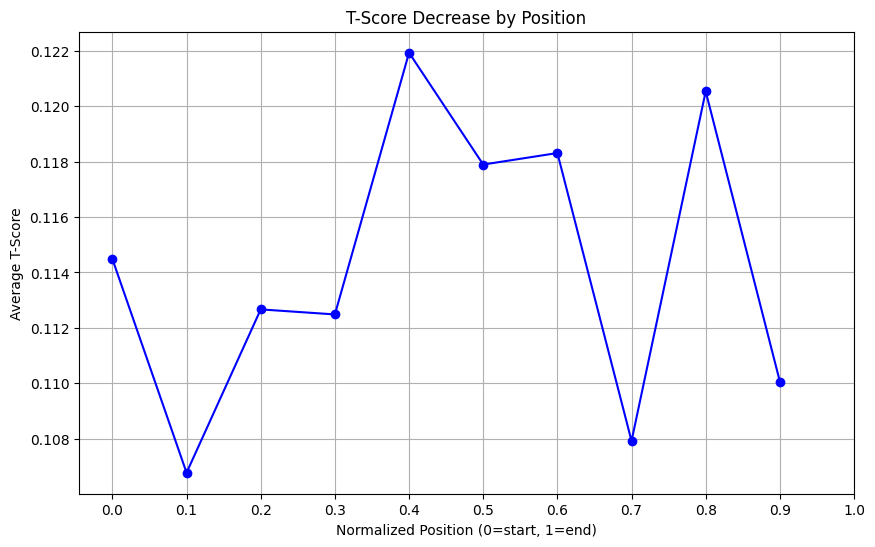


=== Analysis (Include Zero T-Score) ===
Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.0975
Interval 0.10-0.20: Avg T-Score = 0.0877
Interval 0.20-0.30: Avg T-Score = 0.0923
Interval 0.30-0.40: Avg T-Score = 0.0917
Interval 0.40-0.50: Avg T-Score = 0.0998
Interval 0.50-0.60: Avg T-Score = 0.0943
Interval 0.60-0.70: Avg T-Score = 0.0981
Interval 0.70-0.80: Avg T-Score = 0.0878
Interval 0.80-0.90: Avg T-Score = 0.1001
Interval 0.90-1.00: Avg T-Score = 0.0921


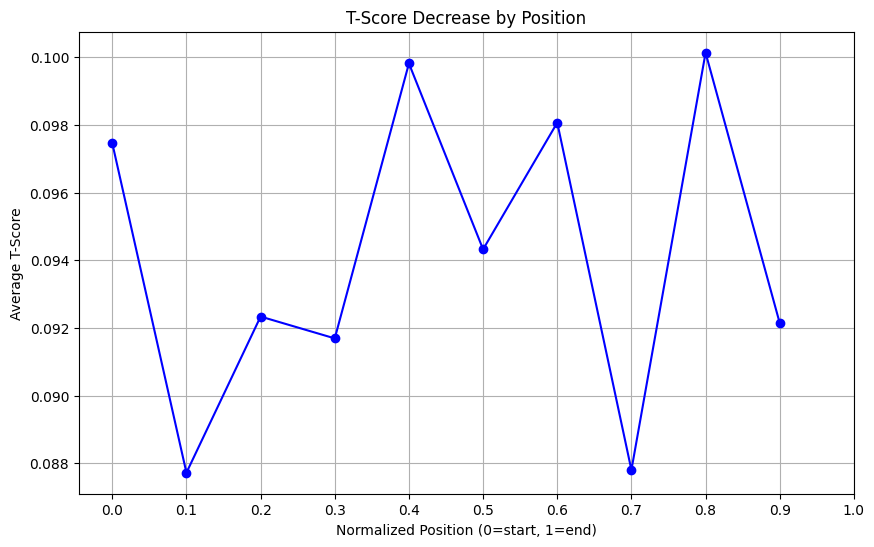

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores(texts_data, ignore_zero_t_score=True):
    results = {"positions": [], "t_scores": []}

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in positions]
            results["positions"].extend(normalized_positions)
            results["t_scores"].extend([t_score] * len(normalized_positions))

    # Группировка позиций по интервалам
    all_positions = results["positions"]
    all_t_scores = results["t_scores"]
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(all_positions, bins)

    # Средний T-Score для каждого интервала
    avg_t_scores = [
        np.mean(
            [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
        )
        for bin_idx in range(1, len(bins))
    ]

    # Текстовый вывод
    print(f"Ignore Zero T-Score: {ignore_zero_t_score}")
    for i in range(len(bins) - 1):
        print(f"Interval {bins[i]:.2f}-{bins[i+1]:.2f}: Avg T-Score = {avg_t_scores[i]:.4f}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.plot(bins[:-1], avg_t_scores, marker='o', color='blue')

    # Оформление графика
    plt.title(f'T-Score Decrease by Position')
    plt.xlabel('Normalized Position (0=start, 1=end)')
    plt.ylabel('Average T-Score')
    plt.xticks(bins)
    plt.grid(True)
    plt.show()

# 1. Игнорируем биграммы с нулевым T-Score
print("=== Analysis (Ignore Zero T-Score) ===")
analyze_t_scores(texts_data, ignore_zero_t_score=True)

# 2. Не игнорируем биграммы с нулевым T-Score
print("\n=== Analysis (Include Zero T-Score) ===")
analyze_t_scores(texts_data, ignore_zero_t_score=False)

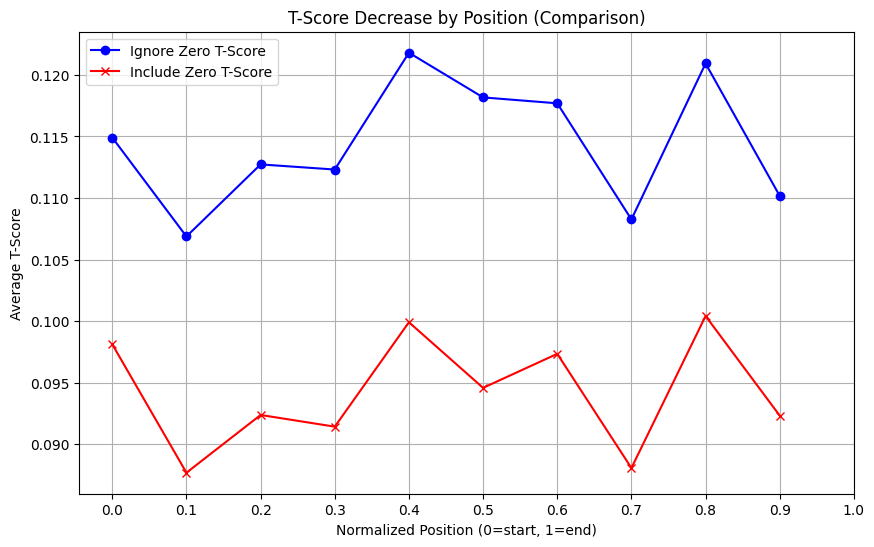

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores(texts_data, ignore_zero_t_score):
    results = {"positions": [], "t_scores": []}

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in positions]
            results["positions"].extend(normalized_positions)
            results["t_scores"].extend([t_score] * len(normalized_positions))

    # Группировка позиций по интервалам
    all_positions = results["positions"]
    all_t_scores = results["t_scores"]
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(all_positions, bins)

    # Средний T-Score для каждого интервала
    avg_t_scores = [
        np.mean(
            [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
        )
        for bin_idx in range(1, len(bins))
    ]
    return bins[:-1], avg_t_scores

# Анализ и объединение данных
bins_ignore, avg_t_scores_ignore = analyze_t_scores(texts_data, ignore_zero_t_score=True)
bins_include, avg_t_scores_include = analyze_t_scores(texts_data, ignore_zero_t_score=False)

# Визуализация
plt.figure(figsize=(10, 6))

# Линия для "игнорируем нулевые T-Score"
plt.plot(bins_ignore, avg_t_scores_ignore, marker='o', color='blue', label='Ignore Zero T-Score')

# Линия для "включаем нулевые T-Score"
plt.plot(bins_include, avg_t_scores_include, marker='x', color='red', label='Include Zero T-Score')

# Оформление графика
plt.title('T-Score Decrease by Position (Comparison)')
plt.xlabel('Normalized Position (0=start, 1=end)')
plt.ylabel('Average T-Score')
plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid(True)
plt.show()

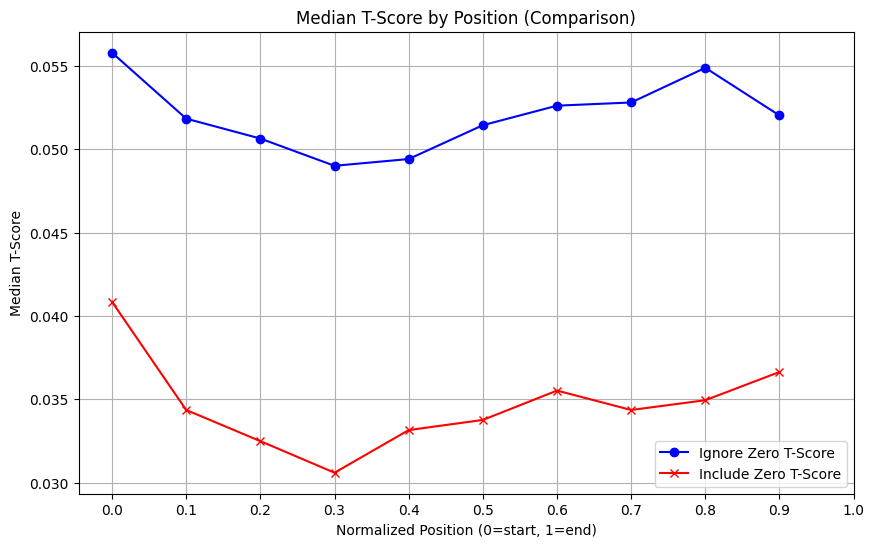

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores(texts_data, ignore_zero_t_score):
    results = {"positions": [], "t_scores": []}

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in positions]
            results["positions"].extend(normalized_positions)
            results["t_scores"].extend([t_score] * len(normalized_positions))

    # Группировка позиций по интервалам
    all_positions = results["positions"]
    all_t_scores = results["t_scores"]
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(all_positions, bins)

    # Медианный T-Score для каждого интервала
    median_t_scores = [
        np.median(
            [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
        )
        for bin_idx in range(1, len(bins))
    ]
    return bins[:-1], median_t_scores

# Анализ и объединение данных
bins_ignore, median_t_scores_ignore = analyze_t_scores(texts_data, ignore_zero_t_score=True)
bins_include, median_t_scores_include = analyze_t_scores(texts_data, ignore_zero_t_score=False)

# Визуализация
plt.figure(figsize=(10, 6))

# Линия для "игнорируем нулевые T-Score"
plt.plot(bins_ignore, median_t_scores_ignore, marker='o', color='blue', label='Ignore Zero T-Score')

# Линия для "включаем нулевые T-Score"
plt.plot(bins_include, median_t_scores_include, marker='x', color='red', label='Include Zero T-Score')

# Оформление графика
plt.title('Median T-Score by Position (Comparison)')
plt.xlabel('Normalized Position (0=start, 1=end)')
plt.ylabel('Median T-Score')
plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.grid(True)
plt.show()

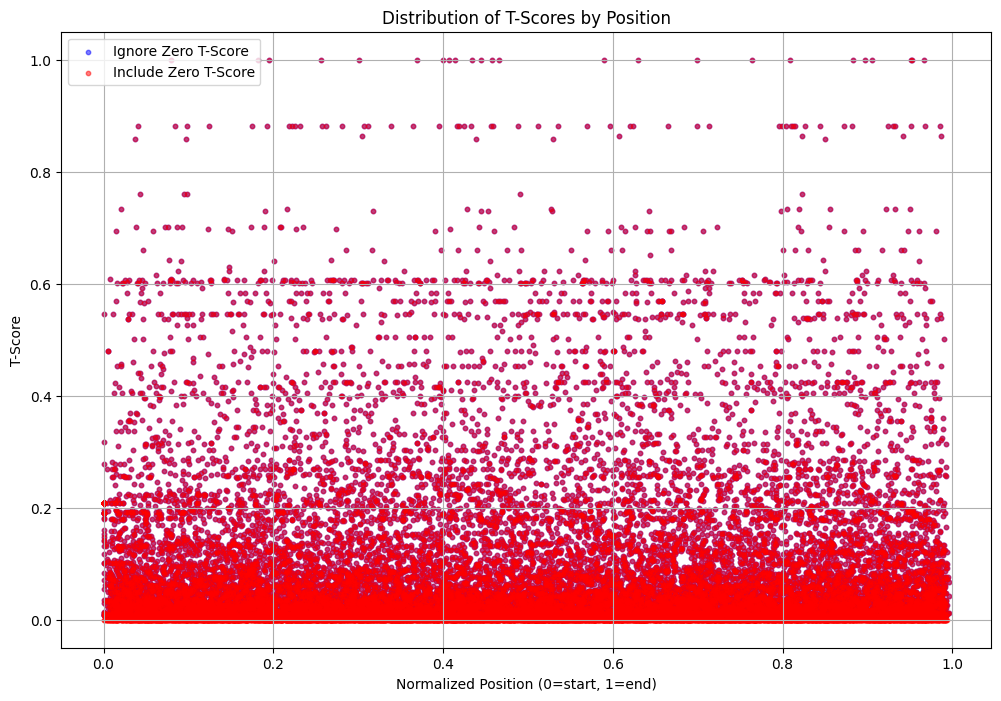

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def collect_t_scores(texts_data, ignore_zero_t_score):
    positions = []
    t_scores = []

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            bigram_positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in bigram_positions]
            positions.extend(normalized_positions)
            t_scores.extend([t_score] * len(normalized_positions))

    return positions, t_scores

# Сбор данных
positions_ignore, t_scores_ignore = collect_t_scores(texts_data, ignore_zero_t_score=True)
positions_include, t_scores_include = collect_t_scores(texts_data, ignore_zero_t_score=False)

# Визуализация
plt.figure(figsize=(12, 8))

# Точки для "игнорируем нулевые T-Score"
plt.scatter(positions_ignore, t_scores_ignore, color='blue', alpha=0.5, label='Ignore Zero T-Score', s=10)

# Точки для "включаем нулевые T-Score"
plt.scatter(positions_include, t_scores_include, color='red', alpha=0.5, label='Include Zero T-Score', s=10)

# Оформление графика
plt.title('Distribution of T-Scores by Position')
plt.xlabel('Normalized Position (0=start, 1=end)')
plt.ylabel('T-Score')
plt.legend()
plt.grid(True)
plt.show()

=== Ignore Zero T-Score ===
=== Statistics ===
Mean T-Score: 0.1144
Standard Deviation (Sigma): 0.1494
Variance: 0.0223
Chi-Square: 123846.5718
p-value: 0.0000e+00

=== Include Zero T-Score ===
=== Statistics ===
Mean T-Score: 0.0942
Standard Deviation (Sigma): 0.1424
Variance: 0.0203
Chi-Square: 216571.5923
p-value: 0.0000e+00


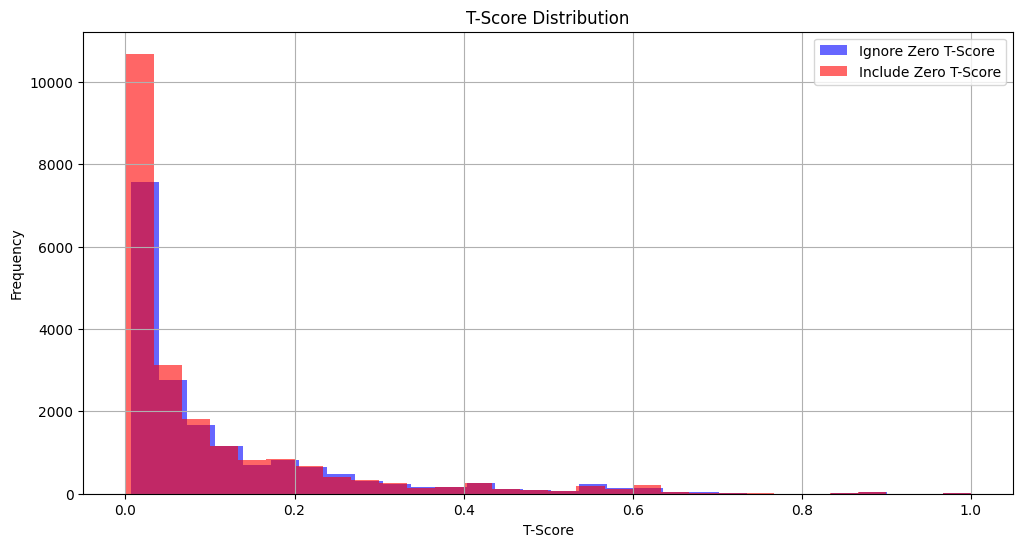

In [ ]:
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Функция для сбора T-Score и их позиций
def collect_t_scores(texts_data, ignore_zero_t_score=True):
    positions = []
    t_scores = []

    for text_id, text_info in texts_data.items():
        text = text_info.get("text", "").lower()
        bigrams = text_info.get("bigrams_unique", {})

        for bigram, metrics in bigrams.items():
            t_score = metrics.get("t_score", 0)
            if ignore_zero_t_score and t_score == 0:
                continue
            bigram_positions = get_bigram_positions(text, bigram)
            normalized_positions = [pos / len(text.split()) for pos in bigram_positions]
            positions.extend(normalized_positions)
            t_scores.extend([t_score] * len(normalized_positions))

    return positions, t_scores

# Расчет статистик
def calculate_statistics(t_scores):
    t_scores = np.array(t_scores)

    # Среднее значение и стандартное отклонение
    mean_t = np.mean(t_scores)
    std_t = np.std(t_scores)

    # Дисперсия
    variance_t = np.var(t_scores)

    # Хи-квадрат
    observed, bins = np.histogram(t_scores, bins='auto')
    expected = np.ones_like(observed) * np.mean(observed)
    chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

    # Вывод результатов
    print("=== Statistics ===")
    print(f"Mean T-Score: {mean_t:.4f}")
    print(f"Standard Deviation (Sigma): {std_t:.4f}")
    print(f"Variance: {variance_t:.4f}")
    print(f"Chi-Square: {chi_square:.4f}")
    print(f"p-value: {p_value:.4e}")

    return mean_t, std_t, variance_t, chi_square, p_value

# Сбор данных
positions_ignore, t_scores_ignore = collect_t_scores(texts_data, ignore_zero_t_score=True)
positions_include, t_scores_include = collect_t_scores(texts_data, ignore_zero_t_score=False)

# Расчет статистик для каждого случая
print("=== Ignore Zero T-Score ===")
calculate_statistics(t_scores_ignore)

print("\n=== Include Zero T-Score ===")
calculate_statistics(t_scores_include)

# Визуализация распределения T-Score
plt.figure(figsize=(12, 6))
plt.hist(t_scores_ignore, bins=30, alpha=0.6, label="Ignore Zero T-Score", color='blue')
plt.hist(t_scores_include, bins=30, alpha=0.6, label="Include Zero T-Score", color='red')
plt.title('T-Score Distribution')
plt.xlabel('T-Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

=== Analysis by Level (Ignore Zero T-Score) ===
Level: LEVEL 2 | Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1175
Interval 0.10-0.20: Avg T-Score = 0.1208
Interval 0.20-0.30: Avg T-Score = 0.1031
Interval 0.30-0.40: Avg T-Score = 0.1140
Interval 0.40-0.50: Avg T-Score = 0.1135
Interval 0.50-0.60: Avg T-Score = 0.1123
Interval 0.60-0.70: Avg T-Score = 0.1112
Interval 0.70-0.80: Avg T-Score = 0.0998
Interval 0.80-0.90: Avg T-Score = 0.1237
Interval 0.90-1.00: Avg T-Score = 0.1107
Level: LEVEL 3 | Ignore Zero T-Score: True
Interval 0.00-0.10: Avg T-Score = 0.1136
Interval 0.10-0.20: Avg T-Score = 0.1111
Interval 0.20-0.30: Avg T-Score = 0.1324
Interval 0.30-0.40: Avg T-Score = 0.1109
Interval 0.40-0.50: Avg T-Score = 0.1418
Interval 0.50-0.60: Avg T-Score = 0.1390
Interval 0.60-0.70: Avg T-Score = 0.1131
Interval 0.70-0.80: Avg T-Score = 0.1084
Interval 0.80-0.90: Avg T-Score = 0.1060
Interval 0.90-1.00: Avg T-Score = 0.1271
Level: LEVEL 4 | Ignore Zero T-Score: True
Int

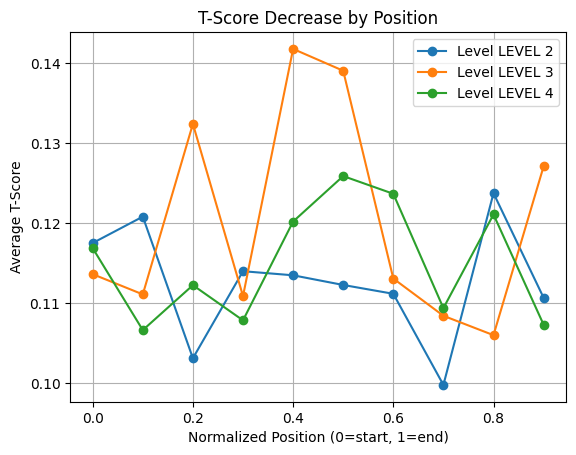


=== Analysis by Level (Include Zero T-Score) ===
Level: LEVEL 2 | Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.1001
Interval 0.10-0.20: Avg T-Score = 0.0993
Interval 0.20-0.30: Avg T-Score = 0.0827
Interval 0.30-0.40: Avg T-Score = 0.0919
Interval 0.40-0.50: Avg T-Score = 0.0866
Interval 0.50-0.60: Avg T-Score = 0.0882
Interval 0.60-0.70: Avg T-Score = 0.0946
Interval 0.70-0.80: Avg T-Score = 0.0821
Interval 0.80-0.90: Avg T-Score = 0.0958
Interval 0.90-1.00: Avg T-Score = 0.0901
Level: LEVEL 3 | Ignore Zero T-Score: False
Interval 0.00-0.10: Avg T-Score = 0.0959
Interval 0.10-0.20: Avg T-Score = 0.0901
Interval 0.20-0.30: Avg T-Score = 0.1125
Interval 0.30-0.40: Avg T-Score = 0.0917
Interval 0.40-0.50: Avg T-Score = 0.1267
Interval 0.50-0.60: Avg T-Score = 0.1106
Interval 0.60-0.70: Avg T-Score = 0.0893
Interval 0.70-0.80: Avg T-Score = 0.0777
Interval 0.80-0.90: Avg T-Score = 0.0857
Interval 0.90-1.00: Avg T-Score = 0.1152
Level: LEVEL 4 | Ignore Zero T-Score: Fals

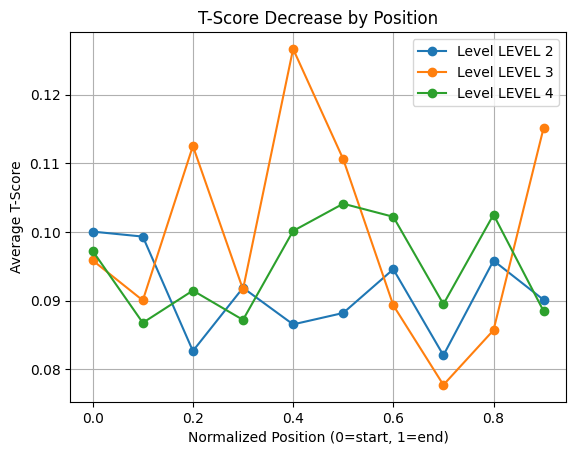

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Загрузка уровня из файла
with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=True):
    level_results = {}

    for level, files in files_by_levels.items():
        all_positions = []
        all_t_scores = []

        for file in files:
            if file in texts_data:
                text_info = texts_data[file]
                text = text_info.get("text", "").lower()
                bigrams = text_info.get("bigrams_unique", {})

                for bigram, metrics in bigrams.items():
                    t_score = metrics.get("t_score", 0)
                    if ignore_zero_t_score and t_score == 0:
                        continue
                    positions = get_bigram_positions(text, bigram)
                    normalized_positions = [pos / len(text.split()) for pos in positions]
                    all_positions.extend(normalized_positions)
                    all_t_scores.extend([t_score] * len(normalized_positions))

        # Группировка позиций по интервалам
        bins = np.linspace(0, 1, 11)
        bin_indices = np.digitize(all_positions, bins)

        # Средний T-Score для каждого интервала
        avg_t_scores = [
            np.mean(
                [all_t_scores[i] for i in range(len(all_t_scores)) if bin_indices[i] == bin_idx]
            )
            for bin_idx in range(1, len(bins))
        ]

        level_results[level] = avg_t_scores

    # Построение графиков и текстовый вывод
    for level, avg_t_scores in level_results.items():
        bins = np.linspace(0, 1, 11)

        # Текстовый вывод
        print(f"Level: {level} | Ignore Zero T-Score: {ignore_zero_t_score}")
        for i in range(len(bins) - 1):
            print(f"Interval {bins[i]:.2f}-{bins[i+1]:.2f}: Avg T-Score = {avg_t_scores[i]:.4f}")

        # Визуализация
        plt.plot(bins[:-1], avg_t_scores, marker='o', label=f'Level {level}')

    # Оформление графика
    plt.title(f'T-Score Decrease by Position')
    plt.xlabel('Normalized Position (0=start, 1=end)')
    plt.ylabel('Average T-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Игнорируем биграммы с нулевым T-Score, анализ по уровням
print("=== Analysis by Level (Ignore Zero T-Score) ===")
analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=True)

# 2. Не игнорируем биграммы с нулевым T-Score, анализ по уровням
print("\n=== Analysis by Level (Include Zero T-Score) ===")
analyze_t_scores_by_level(texts_data, files_by_levels, ignore_zero_t_score=False)

=== Box Plot Analysis by Level (Ignore Zero T-Score) ===


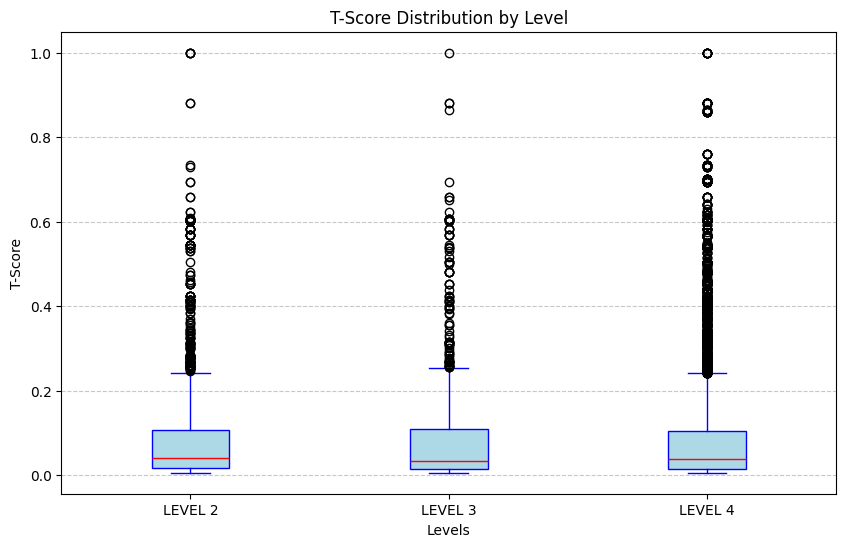


=== Box Plot Analysis by Level (Include Zero T-Score) ===


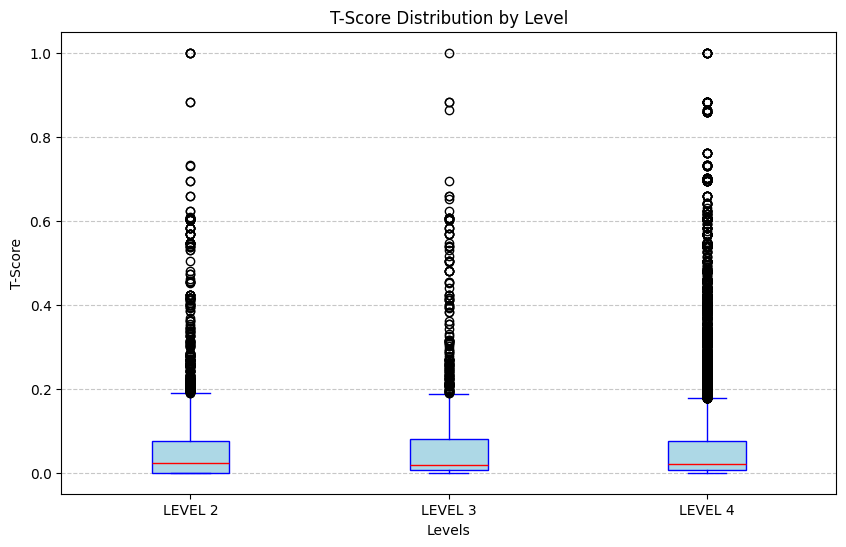

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as file:
    texts_data = json.load(file)

# Загрузка уровня из файла
with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Функция для нахождения позиций биграмм в тексте
def get_bigram_positions(text, bigram):
    words = text.split()
    bigram_words = bigram.split()
    positions = []
    for i in range(len(words) - 1):
        if words[i:i + 2] == bigram_words:
            positions.append(i)
    return positions

# Общая функция для анализа
def analyze_t_scores_by_level_boxplot(texts_data, files_by_levels, ignore_zero_t_score=True):
    level_t_scores = {}

    for level, files in files_by_levels.items():
        all_t_scores = []

        for file in files:
            if file in texts_data:
                text_info = texts_data[file]
                text = text_info.get("text", "").lower()
                bigrams = text_info.get("bigrams_unique", {})

                for bigram, metrics in bigrams.items():
                    t_score = metrics.get("t_score", 0)
                    if ignore_zero_t_score and t_score == 0:
                        continue
                    all_t_scores.append(t_score)

        level_t_scores[level] = all_t_scores

    # Построение ящиков с усами
    plt.figure(figsize=(10, 6))
    plt.boxplot(
        level_t_scores.values(),
        labels=level_t_scores.keys(),
        showfliers=True,  # Показывать выбросы
        patch_artist=True,  # Заливка ящиков цветом
        boxprops=dict(facecolor="lightblue", color="blue"),
        medianprops=dict(color="red"),
        whiskerprops=dict(color="blue"),
        capprops=dict(color="blue"),
    )
    plt.title(f'T-Score Distribution by Level')
    plt.xlabel('Levels')
    plt.ylabel('T-Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 1. Игнорируем биграммы с нулевым T-Score
print("=== Box Plot Analysis by Level (Ignore Zero T-Score) ===")
analyze_t_scores_by_level_boxplot(texts_data, files_by_levels, ignore_zero_t_score=True)

# 2. Не игнорируем биграммы с нулевым T-Score
print("\n=== Box Plot Analysis by Level (Include Zero T-Score) ===")
analyze_t_scores_by_level_boxplot(texts_data, files_by_levels, ignore_zero_t_score=False)